### StarAgile ASSIGNMENT 5 on Recurrent Neural Networks

### Recurrent Neural Networks - IMDB Movie Ratings Analysis

### Assignment Submitted by VINAY M on 19-09-2023

- Apply sentiment analysis on IMDB Movie Ratings and explore the sentiment of ratings provided along with its insights.

- Dataset Link ::https://drive.google.com/drive/folders/1Q1MFjwzYnXDipq7hge_7-pKrStKGKlCj?usp=share_link

- What Kind Of Approach You Could Follow for your Problem Statements :

- Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, Training and Testing, Modeling, Accuracy

- Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.


In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('movie.csv')

In [ ]:
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
# Checking Null
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
# Checking Positive and Negative review counts
df['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
#Renaming Column name
df.rename(columns={'text': 'review','label': 'sentiment'}, inplace=True)

In [ ]:
df

,review,sentiment
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
# Text preprocessing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"wasn't", "should've", 'where', 'you', 'theirs', 'only', 'all', 'shouldn', 'than', 'haven', 'hasn', 'but', 'most', 'so', 'been', 'or', 'she', 'did', 'about', 'weren', 'these', 'above', 'over', 'her', 'have', 'they', 'do', 'themselves', 'nor', 'couldn', 'an', 'ourselves', 'yourselves', 'further', 'more', "aren't", 'them', 'won', 'now', 'y', 'this', "needn't", 'during', 'off', 'each', 'once', 'is', 'should', 'aren', 've', 'between', 'yours', 'up', 'their', 'ain', 'both', "don't", 'am', 'doesn', 'don', "shan't", 'hadn', 'your', 'needn', "won't", "it's", 'doing', 'it', "haven't", "you'll", 'before', 'any', 'shan', 'my', 'from', 'll', 'him', 'me', 'as', 'very', 'out', 'we', 'that', 'be', 'our', 'having', "isn't", "shouldn't", 'here', 'into', 'was', 'wasn', "wouldn't", 'he', 'myself', 'own', 's', 'didn', 'mustn', "that'll", 'with', 'were', 'what', 'because', "you've", 'few', 'in', 'some', 'the', "doesn't", "weren't", 'himself', 'which', "mustn't", 'at', 'ours', 'through', 'while', 'i', 'the

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# The Punkt tokenizer is a pre-trained unsupervised machine learning model for tokenization.
# Tokenization is the process of splitting text into individual words or tokens.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# WordNet is a lexical database for the English language that provides semantic relationships between words.
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Pipeline of Text preprocessing
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# function for lowercasing
def lowercase_text(review):
    return review.lower()

# function for removing URLs
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
def remove_urls(review):
    return re.sub(urlPattern, '', review)

# function for removing usernames
userPattern = '@[^\s]+'
def remove_usernames(review):
    return re.sub(userPattern, '', review)

# function for removing numbers/ years
numberPattern = r'\d'
def remove_numbers(review):
    return re.sub(numberPattern, '', review)

# function for removing punctuation
def remove_punctuation(review):
    return review.translate(str.maketrans('', '', string.punctuation))

# function for tokenization
def tokenize_text(review):
    return word_tokenize(review)

# function for removing stopwords
def remove_stopwords(tokens):
    return [w for w in tokens if w not in stopword]

# Instanciate WordNet Lemmatizer
wordLemm = WordNetLemmatizer()

# function for lemmatization
def lemmatize_words(tokens):
    return [wordLemm.lemmatize(w) for w in tokens if len(w) > 1]

# function to remove repeated words
def remove_same_words(text):
    words = text.split()
    unique_words = set()
    filtered_words = []
    for word in words:
        if word not in unique_words:
            unique_words.add(word)
            filtered_words.append(word)
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Define a function for joining processed text
def join_processed_text(tokens):
    return ' '.join(tokens)

In [ ]:
original_review = "Hello @vinay, How are you, i have created a short film(2023) short which is available at http://www.imdb.com and kindly review it!!!"
processed_review = lowercase_text(original_review)
processed_review = remove_urls(processed_review)
processed_review = remove_usernames(processed_review)
processed_review = remove_numbers(processed_review)
processed_review = remove_punctuation(processed_review)
processed_review = remove_same_words(processed_review)
tokens = tokenize_text(processed_review)
tokens = remove_stopwords(tokens)
lemmatized_tokens = lemmatize_words(tokens)
final_processed_review = join_processed_text(lemmatized_tokens)
print(f'Original:: {original_review}')
print(f'Processed:: {final_processed_review}')

Original:: Hello @vinay, How are you, i have created a short film(2023) short which is available at http://www.imdb.com and kindly review it!!!
Processed:: hello created short film available kindly review


In [ ]:
# Preprocessing Entire Reviews

In [ ]:
df

,review,sentiment
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)", '', text)
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'\d', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = remove_same_words(text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    lemmatized_tokens = [wordLemm.lemmatize(w) for w in tokens if len(w) > 1]
    return ' '.join(lemmatized_tokens)
df['review_processed'] = df['review'].apply(lambda x: preprocess_text(x))

In [ ]:
df

,review,sentiment,review_processed
0,I grew up (b. 1965) watching and loving the Th...,0,grew watching loving thunderbird mate school w...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad army fan nothing ever change g...
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,western union something forgotten classic perh...
39996,This movie is an incredible piece of work. It ...,1,movie incredible piece work explores every noo...
39997,My wife and I watched this movie because we pl...,0,wife watched movie plan visit sicily stromboli...
39998,"When I first watched Flatliners, I was amazed....",1,first watched flatliners amazed necessary feat...


In [ ]:
# identification of common words in processed reviews
from collections import Counter
word_counter = Counter()

# Iterate through each line (text) in the 'text' column
for line in df['review_processed']:
    # Split the line into words, convert to lowercase, and filter out short words
    words = [word.lower() for word in line.split() if len(word) > 2]
    # Update the word_counter with the words from the current line
    word_counter.update(words)

# Get the 30 most common words and their frequencies
common_words = word_counter.most_common(30)

# Print the most common words and their frequencies
common_words

[('movie', 32729),
 ('film', 29614),
 ('one', 23770),
 ('like', 18925),
 ('time', 17364),
 ('character', 15635),
 ('make', 15153),
 ('good', 14904),
 ('get', 14785),
 ('see', 13511),
 ('even', 13308),
 ('story', 12957),
 ('would', 12742),
 ('scene', 12143),
 ('really', 12040),
 ('much', 11107),
 ('well', 11002),
 ('thing', 10671),
 ('way', 10260),
 ('also', 10175),
 ('dont', 10059),
 ('people', 9999),
 ('great', 9951),
 ('first', 9830),
 ('made', 9470),
 ('think', 9216),
 ('could', 9207),
 ('bad', 9186),
 ('know', 8972),
 ('watch', 8710)]

In [ ]:
# identification of common words in negative reviews
from collections import Counter
word_counter = Counter()
for index, row in df.iterrows():
    if row['sentiment'] == 0:
        words = [word.lower() for word in row['review_processed'].split() if len(word) > 2]
        word_counter.update(words)
common_words_neg_reviews = word_counter.most_common(30)
common_words_neg_reviews

[('movie', 17718),
 ('film', 14292),
 ('one', 11756),
 ('like', 10208),
 ('time', 8526),
 ('make', 7961),
 ('get', 7895),
 ('even', 7861),
 ('character', 7797),
 ('good', 7577),
 ('would', 7050),
 ('bad', 6874),
 ('scene', 6411),
 ('really', 6390),
 ('see', 6322),
 ('thing', 6059),
 ('dont', 5939),
 ('much', 5859),
 ('story', 5778),
 ('could', 5367),
 ('acting', 5210),
 ('people', 5162),
 ('made', 5120),
 ('plot', 5079),
 ('way', 4964),
 ('look', 4881),
 ('well', 4732),
 ('first', 4731),
 ('think', 4700),
 ('know', 4665)]

In [ ]:
# identification of common words in positive reviews
from collections import Counter
word_counter = Counter()
for index, row in df.iterrows():
    if row['sentiment'] == 1:
        words = [word.lower() for word in row['review_processed'].split() if len(word) > 2]
        word_counter.update(words)
common_words_pos_reviews = word_counter.most_common(30)
common_words_pos_reviews

[('film', 15322),
 ('movie', 15011),
 ('one', 12014),
 ('time', 8838),
 ('like', 8717),
 ('character', 7838),
 ('good', 7327),
 ('make', 7192),
 ('see', 7189),
 ('story', 7179),
 ('get', 6890),
 ('great', 6707),
 ('well', 6270),
 ('also', 5991),
 ('scene', 5732),
 ('would', 5692),
 ('really', 5650),
 ('even', 5447),
 ('way', 5296),
 ('much', 5248),
 ('life', 5220),
 ('first', 5099),
 ('best', 4919),
 ('love', 4853),
 ('people', 4837),
 ('year', 4772),
 ('show', 4636),
 ('thing', 4612),
 ('think', 4516),
 ('many', 4472)]

In [ ]:
# Word Clouds on Negative Reviews
import wordcloud
from wordcloud import WordCloud

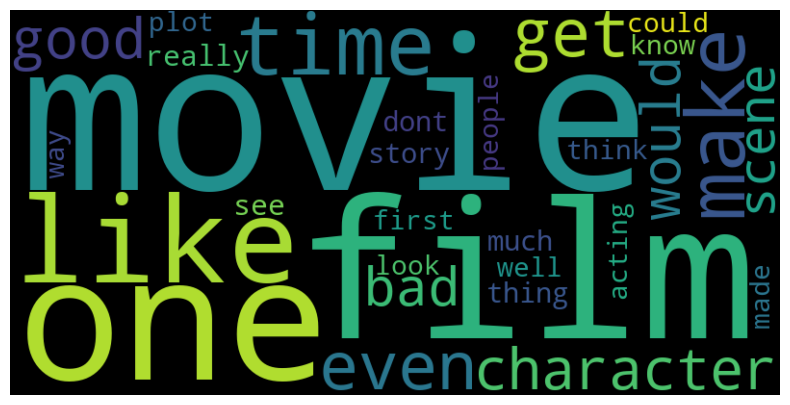

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(dict(common_words_neg_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

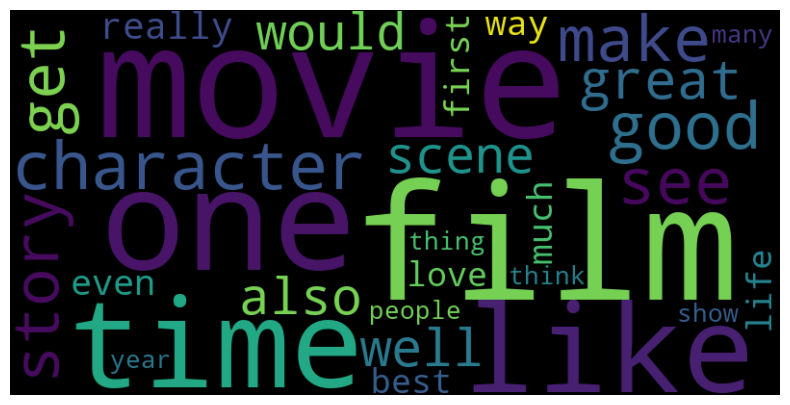

In [ ]:
# Word Clouds on Positive Reviews
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(dict(common_words_pos_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

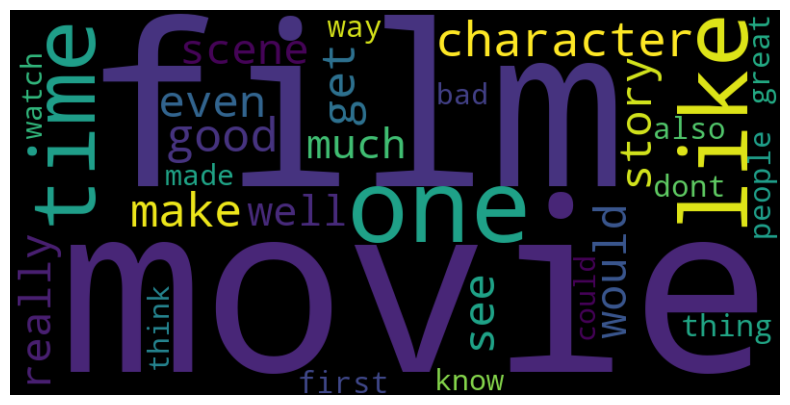

In [ ]:
# Overall
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(dict(common_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# General Insights

In [ ]:
# Original Review
df['review'].values[0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [ ]:
# Processed Review
df['review_processed'].values[0]

'grew watching loving thunderbird mate school watched played lunch wanted virgil scott one alan counting became art form took child see movie hoping would get glimpse loved child bitterly disappointing high point snappy theme tune could compare original score thankfully early saturday morning television channel still play rerun series gerry anderson wife created jonatha frakes hand director chair version completely hopeless waste film utter rubbish cgi remake may acceptable replacing marionette homo sapiens subsp huge error judgment'

In [ ]:
# Associated Sentiment
df['sentiment'].values[0]

0

In [ ]:
# Above Insights fall on Negative Sentiment

In [ ]:
# Splitting X(Review) and Y (Sentiment) for Sentiment Analysis
X = df['review_processed'].values
y = df['sentiment'].values

In [ ]:
X

array(['grew watching loving thunderbird mate school watched played lunch wanted virgil scott one alan counting became art form took child see movie hoping would get glimpse loved child bitterly disappointing high point snappy theme tune could compare original score thankfully early saturday morning television channel still play rerun series gerry anderson wife created jonatha frakes hand director chair version completely hopeless waste film utter rubbish cgi remake may acceptable replacing marionette homo sapiens subsp huge error judgment',
       'put movie dvd player sat coke chip expectation hoping would contain strongpoints first awsome animation good flowing story excellent voice cast funny comedy kickass soundtrack disappointment found atlantis milo return read review might let following paragraph directed seen enjoyed primarily point mentionedbr br scene appears shock picked displaycase local videoshop whatever music feel bad imitation replaced fitting one exception character l

In [ ]:
X.shape

(40000,)

In [ ]:
y.shape

(40000,)

In [ ]:
# finding compatibility of X and Y Rows
if X.shape[0] == y.shape[0]:
    print("Data is compatible for Analyis")
else:
    print("Data is not compatible for Analyis")

Data is compatible for Analyis


In [ ]:
# Tokenisation RNN
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
reviews = pad_sequences(sequences, maxlen=max_len)
print(reviews)

[[   0    0    0 ...  481 2495 4606]
 [   0    0    0 ...  853  905  170]
 [   0    0    0 ...  861  171 1879]
 ...
 [   0    0    0 ... 1093 4145  457]
 [   0    0    0 ...  113  626 1823]
 [   0    0    0 ...  886  224  337]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reviews, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[   0,    0,    0, ...,   18,   34,   13],
       [   0,    0,    0, ...,   93,  516,  912],
       [   0,    0,    0, ..., 1199,  443,   69],
       ...,
       [   0,    0,    0, ...,  302, 1043,  432],
       [   0,    0,    0, ...,  212,  536,  913],
       [   0,    0,    0, ...,    6,   63, 1714]])

In [ ]:
X_test

array([[   0,    0,    0, ...,  880,   84,  482],
       [   0,    0,    0, ...,  838,  302,   44],
       [   0,    0,    0, ...,   14,  230,    4],
       ...,
       [   0,    0,    0, ...,  130, 4554,  109],
       [   0,    0,    0, ..., 1007,  310,  872],
       [   0,    0,    0, ...,  165, 3227, 3175]])

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
y_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
# RNN Libraries

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [ ]:
# RNN Archtecture

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(SimpleRNN(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                5152      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 645,825
Trainable params: 645,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 77s 75ms/step - loss: 0.5100 - accuracy: 0.7377 - val_loss: 0.3908 - val_accuracy: 0.8376
Epoch 2/10
1000/1000 [==============================] - 74s 74ms/step - loss: 0.3052 - accuracy: 0.8746 - val_loss: 0.3596 - val_accuracy: 0.8511
Epoch 3/10
1000/1000 [==============================] - 77s 77ms/step - loss: 0.2170 - accuracy: 0.9148 - val_loss: 0.4318 - val_accuracy: 0.8224
Epoch 4/10
1000/1000 [==============================] - 74s 74ms/step - loss: 0.1267 - accuracy: 0.9543 - val_loss: 0.4841 - val_accuracy: 0.8379
Epoch 5/10
1000/1000 [==============================] - 76s 76ms/step - loss: 0.0851 - accuracy: 0.9702 - val_loss: 0.5842 - val_accuracy: 0.8130
Epoch 6/10
1000/1000 [==============================] - 76s 76ms/step - loss: 0.0555 - accuracy: 0.9814 - val_loss: 0.7966 - val_accuracy: 0.7919
Epoch 7/10
1000/1000 [==============================] - 78s 78ms/step - loss: 0.0557 - accuracy: 0.9811 - val_loss: 0.6698 -

In [ ]:
# Overall accuracy on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}\n Test accuracy: {accuracy:.4f}')

250/250 [==============================] - 6s 24ms/step - loss: 0.7929 - accuracy: 0.8191
Test loss: 0.7929
 Test accuracy: 0.8191


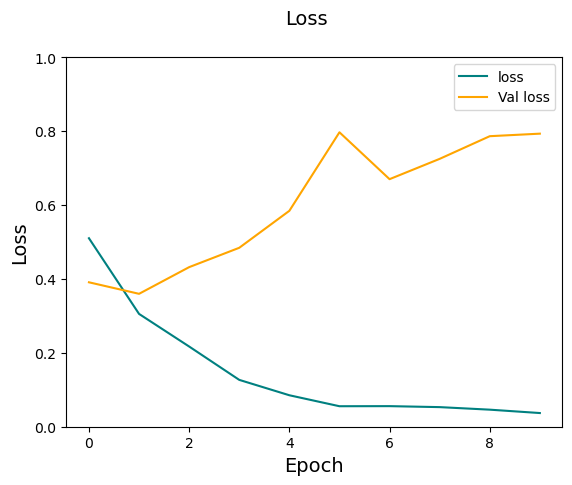

In [ ]:
#Plotting the performance - Training Accuracy and Validation Accuracy
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val loss')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
fig.suptitle("Loss", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

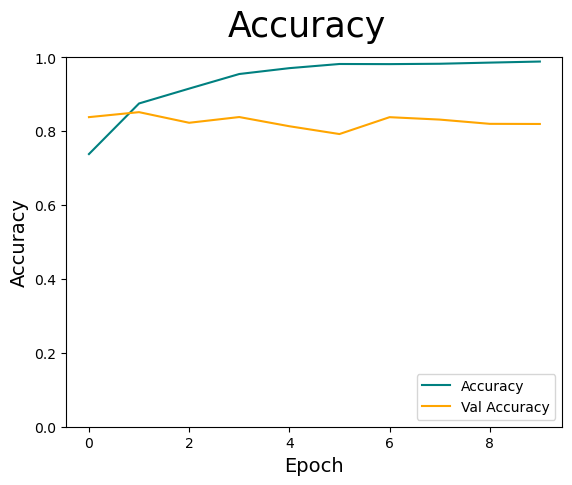

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Testing Negative reviews
sequence = tokenizer.texts_to_sequences(['I hate that movie'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
    print('Positive Review')
else:
    print('Negative Review')

1/1 [==============================] - 0s 59ms/step
[[0.1960223]]
Negative Review


In [ ]:
# Testing Positive Lines
sequence = tokenizer.texts_to_sequences(['Enjoyed that'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
    print('Positive Review')
else:
    print('Negative Review')

1/1 [==============================] - 0s 92ms/step
[[0.19005719]]
Negative Review


In [ ]:
import random
maxrows = df.shape[0]
random_row = random.randint(1, maxrows)
randomText = df['review'].iloc[random_row]
print("Randomly Selected Review is: \n")
print(randomText)
print()
# Testing Positive, Negative and Neutral Review
sequence = tokenizer.texts_to_sequences([randomText])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.40 and pred < 0.60:
    print('Neither Positive nor Negative Review')
elif pred <= 0.4:
    print('Negative Review')
else:
    print('Positive Review')

Randomly Selected Review is: 

This movie is just boring.<br /><br />It tries to copy some effects borrowed to a creative director like Jeunet in "Amélie Poulain", but it is too much. The dialogs are pretty bad, some of the worst I have ever heard, Guillaume Canet is not convincing (I have almost never found him very convincing), his father in the movie plays very badly, the story is dumb, the ending is... stupid.<br /><br />I think I have not dislike a movie so much since "le pacte des loups" (brotherhood of the wolf) from Christophe Gans (and I watch / see about 80-100 movies a year), but at least that movie had some action and lots of good actors.<br /><br />I had never commented here (only rated), and when I saw the rating and the comments, I thought I had to write something down.<br /><br />I guess we won't have problems to sell the DVD we were offered : not such a bad movie in our (large) collection !!!<br /><br />I am open minded (I watch SF, westerns, drama, comedies, silents, 

In [ ]:
inputText = "This movie is just boring"
processedText = preprocess_text(inputText)
sequence = tokenizer.texts_to_sequences([processedText])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
    print('Positive Review')
else:
    print('Negative Review')

1/1 [==============================] - 0s 65ms/step
[[0.00064658]]
Negative Review
